In [143]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [144]:
class Model(nn.Module):
       def __init__(self, in_features=4, h1=9, h2=9, out_reatures=3) -> None:
              super().__init__()
              self.ly1 = nn.Linear(in_features, h1)
              self.ly2 = nn.Linear(h1, h2)
              self.out = nn.Linear(h2, out_reatures)
       def forward(self, x):
              x = F.relu(self.ly1(x))
              x = F.relu(self.ly2(x))
              x = self.out(x) 
              return x

In [145]:
# ngambil seed untuk konsistensi hasil 
torch.manual_seed(42)

model = Model()

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [148]:
df.sample(3)

sepal_length  sepal_width  petal_length  petal_width     species
139           6.9          3.1           5.4          2.1   virginica
110           6.5          3.2           5.1          2.0   virginica
73            6.1          2.8           4.7          1.2  versicolor

In [149]:
# change species into number
df["species"] = df["species"].replace("versicolor", 0.0)
df["species"] = df["species"].replace("virginica", 2.0)
df["species"] = df["species"].replace("setosa", 1.0)
df

/tmp/ipykernel_5253/3304737194.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df["species"].replace("setosa", 1.0)


sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      1.0
1             4.9          3.0           1.4          0.2      1.0
2             4.7          3.2           1.3          0.2      1.0
3             4.6          3.1           1.5          0.2      1.0
4             5.0          3.6           1.4          0.2      1.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]

In [150]:
X = df.drop("species", axis=1)
y = df["species"]

In [151]:
X = X.values
y = y.values

In [152]:
from sklearn.model_selection import train_test_split


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [155]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [156]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [157]:
# train the model
# epoch untuk berapa kali di ulang
epochs = 100
losses = []

for i in range(epochs):
       y_pred = model(X_train) 
       # menghitung loss
       loss = criterion(y_pred, y_train)
       losses.append(loss.detach().numpy())
       if i % 10 == 0:
              print(f"Epoch {i} and loss: {loss}")
       # backprop
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       

Epoch 0 and loss: 1.1270047426223755
Epoch 10 and loss: 0.8052507638931274
Epoch 20 and loss: 0.5535098314285278
Epoch 30 and loss: 0.4159654974937439
Epoch 40 and loss: 0.2884492576122284
Epoch 50 and loss: 0.176025852560997
Epoch 60 and loss: 0.10814659297466278
Epoch 70 and loss: 0.07950753718614578
Epoch 80 and loss: 0.06866893917322159
Epoch 90 and loss: 0.06369214504957199


Text(0.5, 0, 'Epoch')

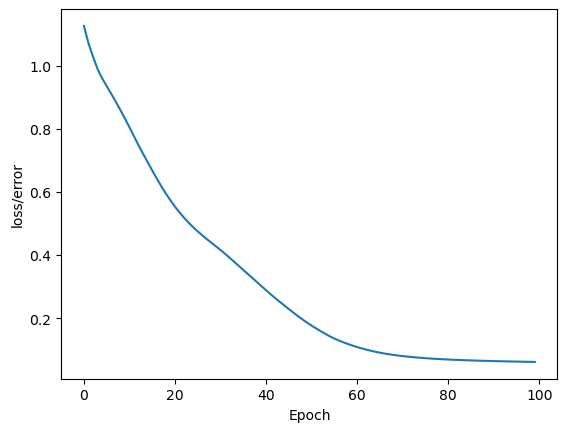

In [158]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

### test data

In [159]:
with torch.no_grad():
       y_eval = model(X_test) # test prediction
       loss = criterion(y_eval, y_test)
loss

tensor(0.0636)

In [160]:
corrent = 0
with torch.no_grad():
       for i, data in enumerate(X_test):
              y_eval = model(data)
              print(f'{i+1} {str(y_eval.argmax().item())} \t {y_test[i]}')
              if y_eval.argmax().item() == y_test[i]:
                     corrent +=1
print(f"corrent={corrent}")      


1 0 	 0
2 1 	 1
3 2 	 2
4 0 	 0
5 0 	 0
6 1 	 1
7 0 	 0
8 2 	 2
9 0 	 0
10 0 	 0
11 2 	 2
12 1 	 1
13 1 	 1
14 1 	 1
15 1 	 1
16 0 	 0
17 2 	 2
18 0 	 0
19 0 	 0
20 2 	 2
21 1 	 1
22 2 	 2
23 1 	 1
24 2 	 2
25 2 	 2
26 2 	 2
27 2 	 2
28 2 	 2
29 1 	 1
30 1 	 1
corrent=30


In [161]:
sample = df.sample(1)
sample, X[sample.index.item()], y[sample.index.item()]

(   sepal_length  sepal_width  petal_length  petal_width  species
 8           4.4          2.9           1.4          0.2      1.0,
 array([4.4, 2.9, 1.4, 0.2]),
 1.0)

In [162]:
new_data = torch.tensor([2, 3.2, 2.4, 1])
with torch.no_grad():
       print(model(new_data).argmax().item())

1


In [163]:
torch.save(model.state_dict(), "iris.pth")

In [164]:
model = Model()
model.load_state_dict(torch.load("iris.pth"))

<All keys matched successfully>

In [165]:
new_data = torch.tensor([5.4, 3.7, 1.5, 0.2]) # 1 atau setosa
with torch.no_grad():
       print(model(new_data).argmax().item())

1
